In [1]:
import os.path as osp
import torch

from augmentation_utils.spec_augmentations import Noise
from datasets.get_builder import get_dataset_builder
from matplotlib import pyplot as plt
from sslh.augments.get_augm import add_builder_process_transform

/home/labbeti/anaconda3/envs/env_sslh/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [2]:
augm = Noise(snr=20, ratio=1.0)
builder = get_dataset_builder("GSC")

base = add_builder_process_transform(None, builder)
transform = add_builder_process_transform(augm, builder)

root = osp.join("..", "datasets")
dataset_raw = builder.get_dataset_val(root, base)
dataset = builder.get_dataset_val(root, transform)

Dataset already download and verified
Dataset already download and verified


Index =  2379
Shape x =  torch.Size([1, 64, 32])
y =  10
Shape x_augm =  torch.Size([1, 64, 32])
y_augm =  10


/home/labbeti/anaconda3/envs/env_sslh/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729062494/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/home/labbeti/anaconda3/envs/env_sslh/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729062494/work/aten/src/ATen/native/SpectralOps.cpp:590.)
  return _VF.stft(input, n_fft, hop_length, win_length, window

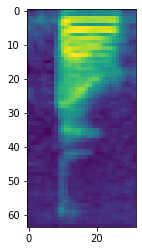

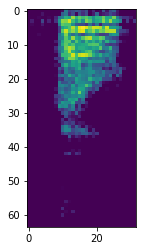

In [3]:
index = torch.randint(low=0, high=len(dataset), size=()).item()
x, y = dataset_raw[index]
x_augm, y_augm = dataset[index]

print("Index = ", index)
print("Shape x = ", x.shape)
print("y = ", y)
print("Shape x_augm = ", x_augm.shape)
print("y_augm = ", y_augm)

x = x.squeeze().numpy()
x_augm = x_augm.squeeze().numpy()

plt.figure()
plt.imshow(x)
plt.savefig(osp.join("..", "results", "img", "x.png"))

plt.figure()
plt.imshow(x_augm)
plt.savefig(osp.join("..", "results", "img", "x_augm.png"))

plt.show()


# RandAugment

In [4]:
import os.path as osp
import torch

from matplotlib import pyplot as plt
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, ToTensor, Normalize, RandomHorizontalFlip, RandomChoice, RandomCrop, RandomAffine

from mlu.transforms.image import RandAugment
from mlu.transforms.image.ra_pools import RAND_AUGMENT_POOL_1, RAND_AUGMENT_POOL_2
from mlu.transforms import ToTensor as ToTensorMLU
from mlu.nn import Permute

In [5]:
dataset_root = osp.join("..", "datasets")
dataset = CIFAR10(dataset_root, train=True, transform=None, target_transform=None)

In [6]:
# augm = RandAugment(nb_augm_apply=1, augm_pool=RAND_AUGMENT_POOL_2)
augm = Compose([
    # RandomAffine(0, translate=(1/16, 1/16)),
    # RandomHorizontalFlip(0.5),
    RandomCrop((32, 32), padding=8),
])

post_process = Compose([
	ToTensor(),
    # Normalize(mean=(0.4914009, 0.48215896, 0.4465308), std=(0.24703279, 0.24348423, 0.26158753)),
    Permute(1, 2, 0),
])

transform = Compose([
    augm,
    post_process,
])

In [7]:
index = 20
image, label = dataset[index]
image_conv = post_process(image)
image_augm = transform(image)

# print(image_conv.min())
# print(image_conv.max())
# print(image_conv.mean())
# print(image_conv.shape)

print(image_augm.min())
print(image_augm.max())
print(image_augm.mean())
print(image_augm.shape)

tensor(0.)
tensor(0.8941)
tensor(0.5779)
torch.Size([32, 32, 3])


In [8]:
# print(image_conv)
# print(image_augm)

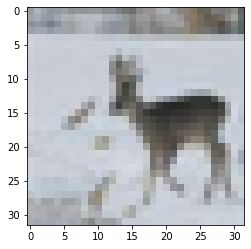

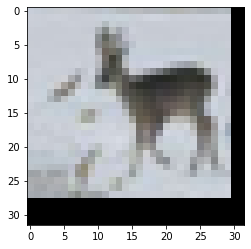

In [9]:
plt.figure()
plt.imshow(image)
# plt.figure()
# plt.imshow(image_conv)
plt.figure()
plt.imshow(image_augm)

plt.show()

In [10]:
import math

nb_steps = 100
frac = 7.8 / 16
lr_lambda = lambda step: math.cos(math.pi * frac * step / nb_steps)
lr = 0.03

In [11]:
step = 100
lr_lambda(step)

0.039259815759068666

In [12]:
import torch
from argparse import Namespace
from matplotlib import pyplot as plt
from sslh.datasets_builders.detail.esc_ds import ESC10_NoSR_Cached
from sslh.datasets_builders.get_builder import get_dataset_builder

In [13]:
itf = get_dataset_builder("ESC10")
args = Namespace()
args.dataset_path = "../datasets"
transform = None
dataset = ESC10_NoSR_Cached(root=args.dataset_path, download=False, transform=transform)

In [14]:
idx = torch.randint(low=0, high=len(dataset), size=()).item()
print("Idx: ", idx)
data, _ = dataset[idx]
spec = itf.get_base_transform()(data)
print(data.shape)
print(spec.shape)

plt.figure()
plt.plot(data.squeeze())
plt.show()

spec = spec.squeeze()
spec = 80.0 - spec

plt.figure()
plt.imshow(spec.numpy(), origin="upper")

plt.figure()
plt.imshow(spec.roll(100, -1).numpy(), origin="upper")

Idx:  374


AttributeError: 'ESC10Builder' object has no attribute 'get_base_transform'

In [ ]:
import torch
from torch.nn import Module, Linear

class M(Module):
    def __init__(self):
        super().__init__()
        self.l1 = Linear(1000, 1000)
        self.l2 = Linear(1000, 1000)

m = M()
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
print(count_parameters(m))

In [ ]:
loader_train_s, loader_train_u = interface.get_split_loaders_train(
    labeled_dataset=dataset_train_raw,
    ratios=[args.supervised_ratio, 1.0 - args.supervised_ratio],
    datasets=[dataset_train_augm_weak, dataset_train_augm_weaks_no_label],
    batch_sizes=[args.batch_size_s, args.batch_size_u],
    drop_last_list=[True, True],
    num_workers_list=[2, 6],
)

loader_train_s, loader_train_u = get_split_loaders_train(
    labeled_dataset=dataset_train_raw,
    ratios=[args.supervised_ratio, 1.0 - args.supervised_ratio],
    args=[dict(
        dataset=dataset_train_augm_weak,
        batch_size=args.batch_size_s,
        drop_last=True,
        num_workers=2,
    ), dict(
        dataset=dataset_train_augm_weaks_no_label,
        batch_size=args.batch_size_s,
        drop_last=True,
        num_workers=2,
    )]
)